<ipython-input-3-7757613f0d23>:36: RuntimeWarning: overflow encountered in double_scalars
  row['P_I_00'] = row['P_I_00'] + (row['P_I_00'] * (-row['P_I_00']) * gamma - row['P_I_01'] - row['P_I_10'] - row['P_I_11'] - row['P_S_00'] * gamma - row['P_S_01'] - row['P_S_10'] - row['P_S_11'] - row['P_R_00'] * gamma - row['P_R_01'] - row['P_R_10'] - row['P_R_11'])
<ipython-input-3-7757613f0d23>:32: RuntimeWarning: invalid value encountered in double_scalars
  row['P_S_00'] = row['P_S_00'] + (row['P_S_00'] * (-row['P_S_01']) - row['P_S_10'] - row['P_S_11'] - row['P_I_00'] * (pi1(0, 0) * beta1 + pi2(0, 0) * beta2) - (pi1(0, 0) + pi2(0, 0)) * (row['P_I_01'] + row['P_I_10'] + row['P_I_11']) - row['P_R_01'] - row['P_R_10'] - row['P_R_11'])


DataFrame:
       P_S_00  P_S_01  P_S_10  P_S_11      P_I_00  P_I_01  P_I_10  P_I_11  \
0   -2.232500     0.3     0.4     0.1   -2.280500     0.2     0.6    0.15   
1   -2.886525     0.3     0.4     0.1   -5.086642     0.2     0.6    0.15   
2   -2.081579     0.3     0.4     0.1  -11.012699     0.2     0.6    0.15   
3    1.148609     0.3     0.4     0.1  -31.681769     0.2     0.6    0.15   
4   12.710823     0.3     0.4     0.1 -186.421425     0.2     0.6    0.15   
..        ...     ...     ...     ...         ...     ...     ...     ...   
95        NaN     0.3     0.4     0.1         NaN     0.2     0.6    0.15   
96        NaN     0.3     0.4     0.1         NaN     0.2     0.6    0.15   
97        NaN     0.3     0.4     0.1         NaN     0.2     0.6    0.15   
98        NaN     0.3     0.4     0.1         NaN     0.2     0.6    0.15   
99        NaN     0.3     0.4     0.1         NaN     0.2     0.6    0.15   

      P_R_00  P_R_01  P_R_10  P_R_11  
0  -1.273210     0.5     

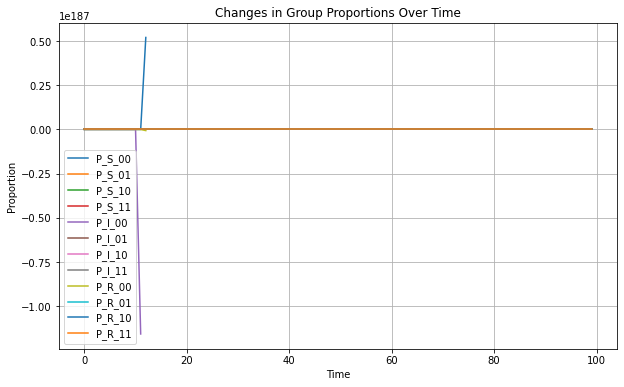

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def pi1(q1, q2):
    return np.exp(q1) / (np.exp(q1) + np.exp(q2))

def pi2(q1, q2):
    return np.exp(q2) / (np.exp(q1) + np.exp(q2))

# Initial values (using float type for consistency)
initial_values = {
    'P_S_00': 0.2,
    'P_S_01': 0.3,
    'P_S_10': 0.4,
    'P_S_11': 0.1,
    'P_I_00': 0.05,
    'P_I_01': 0.2,
    'P_I_10': 0.6,
    'P_I_11': 0.15,
    'P_R_00': 0.1,
    'P_R_01': 0.5,
    'P_R_10': 0.3,
    'P_R_11': 0.1
}

beta1, beta2 = 0.4, 0.5
gamma = 0.15

# Equations for updating proportions
def update_proportions_S(row):
    row['P_S_00'] = row['P_S_00'] + (row['P_S_00'] * (-row['P_S_01']) - row['P_S_10'] - row['P_S_11'] - row['P_I_00'] * (pi1(0, 0) * beta1 + pi2(0, 0) * beta2) - (pi1(0, 0) + pi2(0, 0)) * (row['P_I_01'] + row['P_I_10'] + row['P_I_11']) - row['P_R_01'] - row['P_R_10'] - row['P_R_11'])
    return row

def update_proportions_I(row):
    row['P_I_00'] = row['P_I_00'] + (row['P_I_00'] * (-row['P_I_00']) * gamma - row['P_I_01'] - row['P_I_10'] - row['P_I_11'] - row['P_S_00'] * gamma - row['P_S_01'] - row['P_S_10'] - row['P_S_11'] - row['P_R_00'] * gamma - row['P_R_01'] - row['P_R_10'] - row['P_R_11'])
    return row

def update_proportions_R(row):
    row['P_R_00'] = row['P_R_00'] + (row['P_R_00'] * (-row['P_R_01']) - row['P_R_10'] - row['P_R_11'] - row['P_S_00'] * row['P_S_01'] * row['P_S_10'] * row['P_S_11'] - row['P_I_10'] - row['P_I_01'] - row['P_I_11'])
    return row

# Simulation
time_steps = 100
index = range(time_steps)
df = pd.DataFrame(index=index, columns=initial_values.keys(), dtype=float)
df.loc[0] = initial_values

for t in range(1, time_steps):
    df.loc[t] = update_proportions_S(df.loc[t-1])
    df.loc[t] = update_proportions_I(df.loc[t-1])
    df.loc[t] = update_proportions_R(df.loc[t-1])

# Display the DataFrame
print("DataFrame:")
print(df)

# Plotting
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Changes in Group Proportions Over Time')
plt.legend()
plt.grid(True)
plt.show()
